In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
import os
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Model,Sequential, Input, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D, GlobalMaxPool2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.applications import DenseNet121

In [45]:
directory = os.path.join('../input/motion-history/MHI_updated_resized_Kaggle')
"""
directory1 = os.path.join('../input/motionhistory2/Train/Train')
directory2 = os.path.join('../input/motionhistory2/Valid/Valid')
directory3 = os.path.join('../input/motionhistory2/Test/Test')
"""
disease_types = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18',
                '19','20','21','22','23','24','25','26','27']
print(disease_types)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27']


In [46]:
train_data = []
for i, j in enumerate(disease_types):
    for file in os.listdir(os.path.join(directory, j)):
        train_data.append(['{}/{}'.format(j, file), i, j])
train_df = pd.DataFrame(train_data, columns=['Name', 'DiseaseID','Type'])
train_df.head()
train_df.tail()

,Name,DiseaseID,Type
859,27/a27_s6_t2_color.jpg,26,27
860,27/a27_s2_t3_color.jpg,26,27
861,27/a27_s7_t1_color.jpg,26,27
862,27/a27_s3_t2_color.jpg,26,27
863,27/a27_s1_t3_color.jpg,26,27


In [49]:
"""
train_data = []
for i, j in enumerate(disease_types):
    for file in os.listdir(os.path.join(directory1, j)):
        train_data.append(['{}/{}'.format(j, file), i, j])
train_df = pd.DataFrame(train_data, columns=['Name', 'DiseaseID','Type'])
train_df.head()
train_df.tail()
"""

"\ntrain_data = []\nfor i, j in enumerate(disease_types):\n    for file in os.listdir(os.path.join(directory1, j)):\n        train_data.append(['{}/{}'.format(j, file), i, j])\ntrain_df = pd.DataFrame(train_data, columns=['Name', 'DiseaseID','Type'])\ntrain_df.head()\ntrain_df.tail()\n"

In [50]:
"""
valid_data = []
for i, j in enumerate(disease_types):
    for file in os.listdir(os.path.join(directory2, j)):
        valid_data.append(['{}/{}'.format(j, file), i, j])
valid_df = pd.DataFrame(valid_data, columns=['Name', 'DiseaseID','Type'])
valid_df.head()
valid_df.tail()
"""

"\nvalid_data = []\nfor i, j in enumerate(disease_types):\n    for file in os.listdir(os.path.join(directory2, j)):\n        valid_data.append(['{}/{}'.format(j, file), i, j])\nvalid_df = pd.DataFrame(valid_data, columns=['Name', 'DiseaseID','Type'])\nvalid_df.head()\nvalid_df.tail()\n"

In [51]:
"""
test_data = []
for i, j in enumerate(disease_types):
    for file in os.listdir(os.path.join(directory3, j)):
        test_data.append(['{}/{}'.format(j, file), i, j])
test_df = pd.DataFrame(test_data, columns=['Name', 'DiseaseID','Type'])
test_df.head()
test_df.tail()
"""

"\ntest_data = []\nfor i, j in enumerate(disease_types):\n    for file in os.listdir(os.path.join(directory3, j)):\n        test_data.append(['{}/{}'.format(j, file), i, j])\ntest_df = pd.DataFrame(test_data, columns=['Name', 'DiseaseID','Type'])\ntest_df.head()\ntest_df.tail()\n"

In [53]:
train_df = train_df.sample(frac=1, random_state=42) 
train_df.index = np.arange(len(train_df))
print(train_df.head())
print(train_df.shape)

                     Name  DiseaseID Type
0    4/a4_s3_t1_color.jpg          3    4
1  26/a26_s6_t4_color.jpg         25   26
2  18/a18_s2_t1_color.jpg         17   18
3  13/a13_s2_t4_color.jpg         12   13
4  27/a27_s2_t1_color.jpg         26   27
(864, 3)


In [54]:
"""
train_df = train_df.sample(frac=1, random_state=42) 
train_df.index = np.arange(len(train_df))
print(train_df.head())
valid_df = valid_df.sample(frac=1, random_state=42) 
valid_df.index = np.arange(len(valid_df))
print(valid_df.head())
test_df = test_df.sample(frac=1, random_state=42) 
test_df.index = np.arange(len(test_df))
print(test_df.head())
"""

'\ntrain_df = train_df.sample(frac=1, random_state=42) \ntrain_df.index = np.arange(len(train_df))\nprint(train_df.head())\nvalid_df = valid_df.sample(frac=1, random_state=42) \nvalid_df.index = np.arange(len(valid_df))\nprint(valid_df.head())\ntest_df = test_df.sample(frac=1, random_state=42) \ntest_df.index = np.arange(len(test_df))\nprint(test_df.head())\n'

In [55]:
"""
test_df.shape
test_df['DiseaseID'].value_counts()
"""

"\ntest_df.shape\ntest_df['DiseaseID'].value_counts()\n"

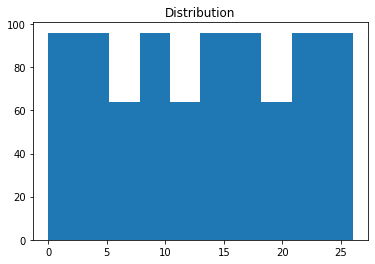

<Figure size 432x432 with 0 Axes>

In [56]:
train = train_df.copy()
plt.hist(train_df['DiseaseID'])
plt.title('Distribution')
plt.figure(figsize=(6, 6))
plt.show()

In [57]:
train = train_df
data_dir = '../input/motion-history/MHI_updated_resized_Kaggle/'
#read_image function
def read_image(filepath):
    return cv2.imread(os.path.join(data_dir, filepath))
#resize_image_function
def resize_image(image, image_size):
    return cv2.resize(image.copy(), image_size, interpolation=cv2.INTER_AREA)
X_train = np.zeros((train.shape[0], 224, 224, 3))
for i, file in tqdm(enumerate(train['Name'].values)):
    image = read_image(file)
    if image is not None:
        X_train[i] = resize_image(image, (224, 224))
# Normalization
X_Train = X_train / 255.
print('Train Shape: {}'.format(X_Train.shape))

X_train = X_Train.copy()
#Y_train = train['DiseaseID'].values
#Y_train = to_categorical(Y_train, num_classes=27)

864it [00:02, 288.18it/s]


Train Shape: (864, 224, 224, 3)


In [38]:
"""
data_dir = '../input/motionhistory2/Train/Train/'
#read_image function
def read_image(filepath):
    return cv2.imread(os.path.join(data_dir, filepath))
#resize_image_function
def resize_image(image, image_size):
    return cv2.resize(image.copy(), image_size, interpolation=cv2.INTER_AREA)
X_train = np.zeros((train.shape[0], 224, 224, 3))
for i, file in tqdm(enumerate(train['Name'].values)):
    image = read_image(file)
    if image is not None:
        X_train[i] = resize_image(image, (224, 224))
# Normalization
X_Train = X_train / 255.
print('Train Shape: {}'.format(X_Train.shape))
X_train = X_Train.copy()
Y_train = train['DiseaseID'].values
Y_train = to_categorical(Y_train, num_classes=27)
"""

1296it [00:03, 334.14it/s]


Train Shape: (1296, 224, 224, 3)


In [39]:
"""
valid = valid_df.copy()
data_dir = '../input/motionhistory2/Valid/Valid/'
#read_image function
def read_image(filepath):
    return cv2.imread(os.path.join(data_dir, filepath))
#resize_image_function
def resize_image(image, image_size):
    return cv2.resize(image.copy(), image_size, interpolation=cv2.INTER_AREA)
X_valid = np.zeros((valid.shape[0], 224, 224, 3))
for i, file in tqdm(enumerate(valid['Name'].values)):
    image = read_image(file)
    if image is not None:
        X_valid[i] = resize_image(image, (224, 224))
# Normalization
X_Valid = X_valid / 255.
print('Train Shape: {}'.format(X_Valid.shape))
X_valid = X_Valid.copy()
Y_valid = valid['DiseaseID'].values
Y_valid = to_categorical(Y_valid, num_classes=27)
"""

216it [00:00, 333.67it/s]


Train Shape: (216, 224, 224, 3)


In [40]:
"""
test = test_df.copy()
data_dir = '../input/motionhistory2/Test/Test/'
#read_image function
def read_image(filepath):
    return cv2.imread(os.path.join(data_dir, filepath))
#resize_image_function
def resize_image(image, image_size):
    return cv2.resize(image.copy(), image_size, interpolation=cv2.INTER_AREA)
X_test = np.zeros((test.shape[0], 224, 224, 3))
for i, file in tqdm(enumerate(test['Name'].values)):
    image = read_image(file)
    if image is not None:
        X_test[i] = resize_image(image, (224, 224))
# Normalization
X_Test = X_test / 255.
print('Train Shape: {}'.format(X_Test.shape))
X_test = X_Test.copy()
Y_test = test['DiseaseID'].values
Y_test = to_categorical(Y_test, num_classes=27)
"""

216it [00:00, 293.08it/s]


Train Shape: (216, 224, 224, 3)


In [41]:
"""
print('Training', len(X_train))
print('Validation', len(X_valid))
print('Testing', len(X_test))
"""

Training 1296
Validation 216
Testing 216


In [61]:

Y_train = train['DiseaseID'].values
Y_train = to_categorical(Y_train, num_classes=27)
X_train, X_test, Y_train, Y_test = train_test_split(X_Train, Y_train, test_size=0.4, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)
print('Training', len(X_train))
print('Validation', len(X_val))
print('Testing', len(X_test))


Training 518
Validation 173
Testing 173


In [60]:
"""
Y_train = train['DiseaseID'].values
Y_train = to_categorical(Y_train, num_classes=27)
X_train, X_test, Y_train, Y_test = train_test_split(X_Train, Y_train, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)
print('Training', len(X_train))
print('Validation', len(X_val))
print('Testing', len(X_test))
"""

"\nY_train = train['DiseaseID'].values\nY_train = to_categorical(Y_train, num_classes=27)\nX_train, X_test, Y_train, Y_test = train_test_split(X_Train, Y_train, test_size=0.2, random_state=42)\nX_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)\nprint('Training', len(X_train))\nprint('Validation', len(X_val))\nprint('Testing', len(X_test))\n"

In [62]:
len(X_Train)

864

In [63]:
len(X_train)

518

In [64]:
EPOCHS = 10
SIZE=224
N_ch=3

In [65]:
from keras.layers import Convolution1D, concatenate, SpatialDropout1D, GlobalMaxPool1D, GlobalAvgPool1D, Embedding, \
    Conv2D, SeparableConv1D, Add, BatchNormalization, Activation, GlobalAveragePooling2D, LeakyReLU, Flatten
from keras.layers import Dense, Input, Dropout, MaxPooling2D, Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D, \
    Lambda, Multiply, LSTM, Bidirectional, PReLU, MaxPooling1D

# DenseNET201

In [68]:
from keras.applications import DenseNet169
from keras.applications import DenseNet201
def build_densenet():
    densenet = DenseNet201(weights='imagenet', include_top=False)

    input = Input(shape=(224, 224, 3))
    x = Conv2D(3, (3, 3), padding='same')(input)
    x = densenet(x)
    out1 = GlobalMaxPooling2D()(x)
    out2 = GlobalAveragePooling2D()(x)
    out3 = Flatten()(x)
    x = Concatenate(axis=-1)([out1, out2, out3])
    x = Dropout(0.5)(x)
    output = Dense(27,activation = 'sigmoid', name='root')(x)
    model = Model(input,output)
    optimizer = Adam(lr=0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()
    
    return model

In [69]:
model = build_densenet()
checkpoint = ModelCheckpoint('DenseNet201_RGB.h5', verbose=1, save_best_only=True)
#dataa augmentation pipeline
datagen = ImageDataGenerator(rotation_range=360, # rotations
                        width_shift_range=0.2, #  horizontal shifts
                        height_shift_range=0.2, # vertical shifts
                        zoom_range=0.2, # zoom
                        horizontal_flip=True, # flip inputs horizontally
                        vertical_flip=True) # flip inputs vertically

datagen.fit(X_train)

hist = model.fit(X_train, Y_train, batch_size=16,
               epochs=50,
               verbose=2,
               callbacks=[checkpoint],
               validation_data=(X_val, Y_val))

# model fitting
"""
hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=32),
               steps_per_epoch=X_train.shape[0] // 32,
               epochs=100,
               verbose=2,
               callbacks=[checkpoint],
               validation_data=(X_valid, Y_valid))
"""

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 224, 224, 3)  84          input_6[0][0]                    
__________________________________________________________________________________________________
densenet201 (Functional)        (None, None, None, 1 18321984    conv2d_2[0][0]                   
__________________________________________________________________________________________________
global_max_pooling2d_2 (GlobalM (None, 1920)         0           densenet201[0][0]                
____________________________________________________________________________________________

'\nhist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=32),\n               steps_per_epoch=X_train.shape[0] // 32,\n               epochs=100,\n               verbose=2,\n               callbacks=[checkpoint],\n               validation_data=(X_valid, Y_valid))\n'

In [77]:
model = load_model('./DenseNet201_RGB.h5')
y_pred_D201 = model.predict(X_test)
y_pred_D201 = np.array(y_pred_D201)
b = np.zeros_like(y_pred_D201)
b[np.arange(len(y_pred_D201)), y_pred_D201.argmax(1)] = 1
from sklearn.metrics import classification_report
print(classification_report(Y_test, b))
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, b))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.89      1.00      0.94         8
           2       1.00      0.80      0.89         5
           3       0.89      1.00      0.94         8
           4       1.00      0.33      0.50         3
           5       0.89      1.00      0.94         8
           6       1.00      1.00      1.00         5
           7       0.67      0.80      0.73         5
           8       0.38      1.00      0.55         3
           9       1.00      0.43      0.60         7
          10       1.00      0.50      0.67         6
          11       1.00      0.83      0.91         6
          12       0.86      1.00      0.92         6
          13       1.00      1.00      1.00         4
          14       1.00      0.50      0.67         2
          15       0.89      0.89      0.89         9
          16       1.00      1.00      1.00         6
          17       1.00    

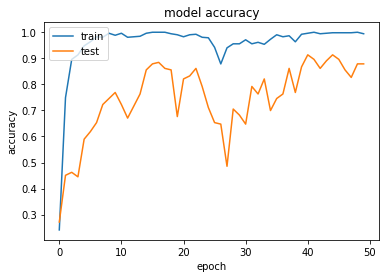

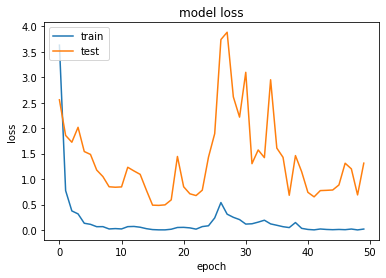

In [80]:
# accuracy plot 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [78]:
x = y_pred_D201.copy()

In [ ]:
y = y_pred.copy()

In [ ]:
p = y_pred.copy()

In [95]:
z = (x*y)

In [96]:
z

array([[2.7162529e-14, 2.5846191e-17, 5.8938921e-13, ..., 1.8047386e-10,
        7.0381312e-10, 2.5061753e-01],
       [1.0008994e-10, 3.0198886e-14, 9.6132954e-14, ..., 5.4612646e-13,
        3.3795780e-13, 2.9033230e-12],
       [1.2456903e-09, 2.3499837e-11, 3.6546616e-11, ..., 5.8248729e-01,
        7.1168755e-09, 1.3259947e-07],
       ...,
       [6.6191358e-12, 9.9159500e-17, 8.3175055e-12, ..., 1.7329485e-13,
        6.0587841e-12, 4.3777821e-09],
       [8.9381383e-06, 1.8191704e-06, 3.5198564e-03, ..., 1.9918298e-14,
        3.0859605e-16, 1.5924880e-15],
       [2.2244397e-08, 2.8588323e-10, 7.9921708e-10, ..., 8.9636460e-02,
        2.0405400e-08, 1.3855730e-06]], dtype=float32)

In [97]:
d = np.zeros_like(z)
d[np.arange(len(z)), z.argmax(1)] = 1
from sklearn.metrics import classification_report
print(classification_report(Y_test, d))
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, d))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.88      0.88      0.88         8
           2       1.00      0.80      0.89         5
           3       0.89      1.00      0.94         8
           4       0.50      0.33      0.40         3
           5       1.00      0.88      0.93         8
           6       1.00      1.00      1.00         5
           7       0.83      1.00      0.91         5
           8       0.38      1.00      0.55         3
           9       1.00      0.29      0.44         7
          10       1.00      0.83      0.91         6
          11       1.00      0.83      0.91         6
          12       0.67      1.00      0.80         6
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         2
          15       0.90      1.00      0.95         9
          16       1.00      1.00      1.00         6
          17       1.00    

# DenseNET121

In [81]:
def build_densenet():
    densenet = DenseNet121(weights='imagenet', include_top=False)

    input = Input(shape=(224, 224, 3))
    x = Conv2D(3, (3, 3), padding='same')(input)
    x = densenet(x)
    out1 = GlobalMaxPooling2D()(x)
    out2 = GlobalAveragePooling2D()(x)
    out3 = Flatten()(x)
    x = Concatenate(axis=-1)([out1, out2, out3])
    x = Dropout(0.5)(x)
    output = Dense(27,activation = 'sigmoid', name='root')(x)
    model = Model(input,output)
    optimizer = Adam(lr=0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()
    
    return model

In [84]:
model = build_densenet()
checkpoint = ModelCheckpoint('DenseNet121_RGB.h5', verbose=1, save_best_only=True)
#dataa augmentation pipeline
datagen = ImageDataGenerator(rotation_range=360, # rotations
                        width_shift_range=0.2, #  horizontal shifts
                        height_shift_range=0.2, # vertical shifts
                        zoom_range=0.2, # zoom
                        horizontal_flip=True, # flip inputs horizontally
                        vertical_flip=True) # flip inputs vertically
datagen.fit(X_train)
hist = model.fit(X_train, Y_train, batch_size=16,
               epochs=50,
               verbose=2,
               callbacks=[checkpoint],
               validation_data=(X_val, Y_val))

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 224, 224, 3)  84          input_12[0][0]                   
__________________________________________________________________________________________________
densenet121 (Functional)        (None, None, None, 1 7037504     conv2d_5[0][0]                   
__________________________________________________________________________________________________
global_max_pooling2d_5 (GlobalM (None, 1024)         0           densenet121[0][0]                
____________________________________________________________________________________________

In [85]:
model = load_model('./DenseNet121_RGB.h5')
y_pred_D121 = model.predict(X_test)
y_pred_D121 = np.array(y_pred_D121)
c = np.zeros_like(y_pred_D121)
c[np.arange(len(y_pred_D121)), y_pred_D121.argmax(1)] = 1
from sklearn.metrics import classification_report
print(classification_report(Y_test, c))
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, c))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.88      0.93         8
           2       1.00      1.00      1.00         5
           3       0.80      1.00      0.89         8
           4       0.50      0.67      0.57         3
           5       1.00      0.62      0.77         8
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       0.43      1.00      0.60         3
           9       1.00      0.57      0.73         7
          10       0.83      0.83      0.83         6
          11       1.00      1.00      1.00         6
          12       0.40      1.00      0.57         6
          13       1.00      1.00      1.00         4
          14       0.50      0.50      0.50         2
          15       0.90      1.00      0.95         9
          16       1.00      0.67      0.80         6
          17       1.00    

In [88]:
y = y_pred_D121.copy()

# **DENSENET169**

In [103]:
def build_densenet():
    densenet = DenseNet169(weights='imagenet', include_top=False)

    input = Input(shape=(224, 224, 3))
    x = Conv2D(3, (3, 3), padding='same')(input)
    x = densenet(x)
    out1 = GlobalMaxPooling2D()(x)
    out2 = GlobalAveragePooling2D()(x)
    out3 = Flatten()(x)
    x = Concatenate(axis=-1)([out1, out2, out3])
    x = Dropout(0.5)(x)
    output = Dense(27,activation = 'sigmoid', name='root')(x)
    model = Model(input,output)
    optimizer = Adam(lr=0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()
    
    return model

In [104]:
model = build_densenet()
checkpoint = ModelCheckpoint('DenseNet169_RGB.h5', verbose=1, save_best_only=True)
#dataa augmentation pipeline
datagen = ImageDataGenerator(rotation_range=360, # rotations
                        width_shift_range=0.2, #  horizontal shifts
                        height_shift_range=0.2, # vertical shifts
                        zoom_range=0.2, # zoom
                        horizontal_flip=True, # flip inputs horizontally
                        vertical_flip=True) # flip inputs vertically
datagen.fit(X_train)
hist = model.fit(X_train, Y_train, batch_size=16,
               epochs=50,
               verbose=2,
               callbacks=[checkpoint],
               validation_data=(X_val, Y_val))

51879936/51877672 [==============================] - 0s 0us/step
Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 224, 224, 3)  84          input_18[0][0]                   
__________________________________________________________________________________________________
densenet169 (Functional)        (None, None, None, 1 12642880    conv2d_8[0][0]                   
__________________________________________________________________________________________________
global_max_pooling2d_8 (GlobalM (None, 1664)         0           densenet169[0][0]                
___________________________

In [105]:
model = load_model('./DenseNet169_RGB.h5')
y_pred_D169 = model.predict(X_test)
y_pred_D169 = np.array(y_pred_D169)
d = np.zeros_like(y_pred_D169)
d[np.arange(len(y_pred_D169)), y_pred_D169.argmax(1)] = 1
from sklearn.metrics import classification_report
print(classification_report(Y_test, d))
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, d))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       0.88      0.88      0.88         8
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         8
           4       0.75      1.00      0.86         3
           5       1.00      0.88      0.93         8
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      0.67      0.80         3
           9       0.86      0.86      0.86         7
          10       1.00      1.00      1.00         6
          11       1.00      0.83      0.91         6
          12       0.86      1.00      0.92         6
          13       1.00      1.00      1.00         4
          14       1.00      0.50      0.67         2
          15       0.82      1.00      0.90         9
          16       0.86      1.00      0.92         6
          17       1.00    

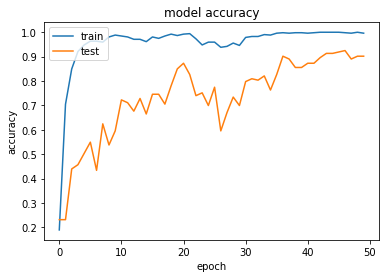

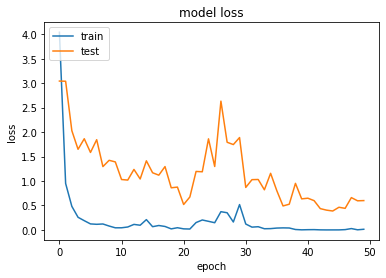

In [106]:
# accuracy plot 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Ensemble

In [107]:
x = y_pred_D201.copy()

In [108]:
y = y_pred_D121.copy()

In [109]:
z = y_pred_D169.copy()

In [122]:
MP = (x*y*z)

In [123]:
e = np.zeros_like(MP)
e[np.arange(len(MP)), MP.argmax(1)] = 1
from sklearn.metrics import classification_report
print(classification_report(Y_test, e))
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, e))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.89      1.00      0.94         8
           2       1.00      0.80      0.89         5
           3       0.89      1.00      0.94         8
           4       0.75      1.00      0.86         3
           5       1.00      0.88      0.93         8
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      0.67      0.80         3
           9       0.86      0.86      0.86         7
          10       1.00      1.00      1.00         6
          11       1.00      0.83      0.91         6
          12       0.75      1.00      0.86         6
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         2
          15       0.90      1.00      0.95         9
          16       1.00      1.00      1.00         6
          17       1.00    

In [127]:
MP = (x*y)

In [128]:
e = np.zeros_like(MP)
e[np.arange(len(MP)), MP.argmax(1)] = 1
from sklearn.metrics import classification_report
print(classification_report(Y_test, e))
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, e))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.88      0.88      0.88         8
           2       1.00      0.80      0.89         5
           3       0.89      1.00      0.94         8
           4       0.50      0.33      0.40         3
           5       1.00      0.88      0.93         8
           6       1.00      1.00      1.00         5
           7       0.83      1.00      0.91         5
           8       0.38      1.00      0.55         3
           9       1.00      0.29      0.44         7
          10       1.00      0.83      0.91         6
          11       1.00      0.83      0.91         6
          12       0.67      1.00      0.80         6
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         2
          15       0.90      1.00      0.95         9
          16       1.00      1.00      1.00         6
          17       1.00    

In [129]:
MP = (x*z)

In [130]:
e = np.zeros_like(MP)
e[np.arange(len(MP)), MP.argmax(1)] = 1
from sklearn.metrics import classification_report
print(classification_report(Y_test, e))
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, e))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.89      1.00      0.94         8
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      0.67      0.80         3
           9       0.88      1.00      0.93         7
          10       1.00      1.00      1.00         6
          11       1.00      0.83      0.91         6
          12       0.75      1.00      0.86         6
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         2
          15       0.90      1.00      0.95         9
          16       1.00      1.00      1.00         6
          17       1.00    

In [131]:
MP = (y*z)

In [132]:
e = np.zeros_like(MP)
e[np.arange(len(MP)), MP.argmax(1)] = 1
from sklearn.metrics import classification_report
print(classification_report(Y_test, e))
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, e))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84         8
           1       0.86      0.75      0.80         8
           2       1.00      0.80      0.89         5
           3       0.89      1.00      0.94         8
           4       0.75      1.00      0.86         3
           5       1.00      0.88      0.93         8
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      0.67      0.80         3
           9       0.86      0.86      0.86         7
          10       1.00      1.00      1.00         6
          11       1.00      0.83      0.91         6
          12       0.75      1.00      0.86         6
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         2
          15       0.90      1.00      0.95         9
          16       1.00      1.00      1.00         6
          17       1.00    

# Extracting the region of interest 

In [164]:
pip install imutils

Note: you may need to restart the kernel to use updated packages.


In [204]:
import cv2
import imutils
def crop_contour_brain_img(image, plot = False):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    grayscale = cv2.GaussianBlur(image, (5,5), 0)
    threshold_image = cv2.threshold(grayscale, 45, 255, cv2.THRESH_BINARY)[1]
    threshold_image = cv2.erode(threshold_image, None, iterations = 2)
    threshold_image = cv2.dilate(threshold_image, None, iterations = 2)
    
    contour = cv2.findContours(threshold_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour = imutils.grab_contours(contour)
    c = max(contour, key = cv2.contourArea)
    
    extreme_pnts_left = tuple(c[c[:,:, 0].argmin()][0])
    extreme_pnts_right = tuple(c[c[:,:, 0].argmax()][0])
    extreme_pnts_top = tuple(c[c[:,:, 1].argmin()][0])
    extreme_pnts_bot = tuple(c[c[:,:, 1].argmax()][0])
    
    new_image = image[extreme_pnts_top[1]:extreme_pnts_bot[1], extreme_pnts_left[0]:extreme_pnts_right[0]]
    new_image = cv2.resize(new_image, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
    
    
    if plot:
        plt.figure()
        plt.subplot(1,2,1)
        plt.imshow(image, 'gray')
        plt.tick_params(axis = 'both', which = 'both', top = False, bottom = False, left = False, right = False, labelbottom = False,
                       labeltop = False, labelright = False, labelleft = False)
        plt.title('original image')
        plt.subplot(1,2,2)
        plt.imshow(new_image, 'gray')
        
        plt.tick_params(axis = 'both', which = 'both', top = False, bottom = False, left = False, right = False, labelbottom = False,
                       labeltop = False, labelright = False, labelleft = False )
        plt.title('cropped image')    
    return new_image

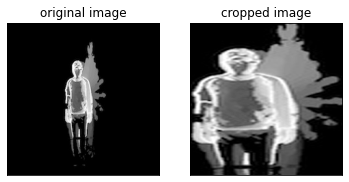

In [214]:
def read_image(filepath):
    return cv2.imread(os.path.join(data_dir, filepath))

image = read_image('21/a21_s5_t4_color.jpg')
x = crop_contour_brain_img(image, plot = True)

In [244]:
train = train_df
data_dir = '../input/motion-history/MHI_updated_resized_Kaggle/'
#read_image function
def read_image(filepath):
    return cv2.imread(os.path.join(data_dir, filepath))
#resize_image_function
def resize_image(image, image_size):
    return cv2.resize(image.copy(), image_size, interpolation=cv2.INTER_AREA)
X_train = np.zeros((train.shape[0], 224, 224, 3))
for i, file in tqdm(enumerate(train['Name'].values)):
    image = read_image(file)
    image = crop_contour_brain_img(image, plot = False)
    cv2.imwrite('./'+ str(i) + '.jpg', image)
    image = cv2.imread('./'+ str(i) + '.jpg')
    if image is not None:
        X_train[i] = resize_image(image, (224, 224))
# Normalization
X_Train = X_train / 255.
print('Train Shape: {}'.format(X_Train.shape))

X_train = X_Train.copy()
#Y_train = train['DiseaseID'].values
#Y_train = to_categorical(Y_train, num_classes=27)

864it [00:03, 243.01it/s]


Train Shape: (864, 224, 224, 3)


In [245]:
Y_train = train['DiseaseID'].values
Y_train = to_categorical(Y_train, num_classes=27)
X_train, X_test, Y_train, Y_test = train_test_split(X_Train, Y_train, test_size=0.4, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)
print('Training', len(X_train))
print('Validation', len(X_val))
print('Testing', len(X_test))

Training 518
Validation 173
Testing 173


In [246]:
EPOCHS = 10
SIZE=224
N_ch=3

# Densenet201

In [247]:
from keras.applications import DenseNet169
from keras.applications import DenseNet201
def build_densenet():
    densenet = DenseNet201(weights='imagenet', include_top=False)

    input = Input(shape=(224, 224, 3))
    x = Conv2D(3, (3, 3), padding='same')(input)
    x = densenet(x)
    out1 = GlobalMaxPooling2D()(x)
    out2 = GlobalAveragePooling2D()(x)
    out3 = Flatten()(x)
    x = Concatenate(axis=-1)([out1, out2, out3])
    x = Dropout(0.5)(x)
    output = Dense(27,activation = 'sigmoid', name='root')(x)
    model = Model(input,output)
    optimizer = Adam(lr=0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()
    
    return model

In [253]:
model = build_densenet()
checkpoint = ModelCheckpoint('DenseNet201_RGB_ROI.h5', verbose=1, save_best_only=True)
#dataa augmentation pipeline
datagen = ImageDataGenerator(rotation_range=360, # rotations
                        width_shift_range=0.2, #  horizontal shifts
                        height_shift_range=0.2, # vertical shifts
                        zoom_range=0.2, # zoom
                        horizontal_flip=True, # flip inputs horizontally
                        vertical_flip=True) # flip inputs vertically

datagen.fit(X_train)

hist = model.fit(X_train, Y_train, batch_size=16,
               epochs=50,
               verbose=2,
               callbacks=[checkpoint],
               validation_data=(X_val, Y_val))

# model fitting
"""
hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=32),
               steps_per_epoch=X_train.shape[0] // 32,
               epochs=100,
               verbose=2,
               callbacks=[checkpoint],
               validation_data=(X_valid, Y_valid))
"""

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_26 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 224, 224, 3)  84          input_26[0][0]                   
__________________________________________________________________________________________________
densenet201 (Functional)        (None, None, None, 1 18321984    conv2d_12[0][0]                  
__________________________________________________________________________________________________
global_max_pooling2d_11 (Global (None, 1920)         0           densenet201[0][0]                
___________________________________________________________________________________________

'\nhist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=32),\n               steps_per_epoch=X_train.shape[0] // 32,\n               epochs=100,\n               verbose=2,\n               callbacks=[checkpoint],\n               validation_data=(X_valid, Y_valid))\n'

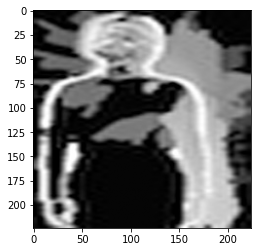

In [252]:
plt.imshow(X_train[1], 'gray')

In [254]:
model = load_model('./DenseNet201_RGB_ROI.h5')
y_pred_D201_ROI = model.predict(X_test)
y_pred_D201_ROI = np.array(y_pred_D201_ROI)
f = np.zeros_like(y_pred_D201_ROI)
f[np.arange(len(y_pred_D201_ROI)), y_pred_D201_ROI.argmax(1)] = 1
from sklearn.metrics import classification_report
print(classification_report(Y_test, f))
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, f))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.89      1.00      0.94         8
           2       0.75      0.60      0.67         5
           3       1.00      0.50      0.67         8
           4       0.50      1.00      0.67         3
           5       0.56      0.62      0.59         8
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         7
          10       1.00      0.67      0.80         6
          11       1.00      0.50      0.67         6
          12       0.86      1.00      0.92         6
          13       1.00      1.00      1.00         4
          14       0.50      0.50      0.50         2
          15       0.62      0.89      0.73         9
          16       1.00      0.83      0.91         6
          17       0.75    

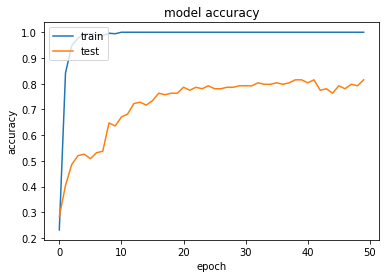

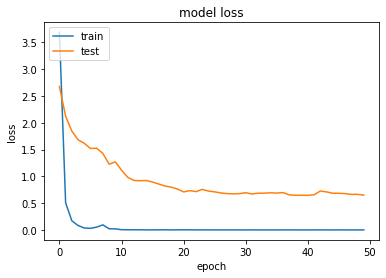

In [255]:
# accuracy plot 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# densenet121

In [256]:
def build_densenet():
    densenet = DenseNet121(weights='imagenet', include_top=False)

    input = Input(shape=(224, 224, 3))
    x = Conv2D(3, (3, 3), padding='same')(input)
    x = densenet(x)
    out1 = GlobalMaxPooling2D()(x)
    out2 = GlobalAveragePooling2D()(x)
    out3 = Flatten()(x)
    x = Concatenate(axis=-1)([out1, out2, out3])
    x = Dropout(0.5)(x)
    output = Dense(27,activation = 'sigmoid', name='root')(x)
    model = Model(input,output)
    optimizer = Adam(lr=0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()
    
    return model

In [257]:
model = build_densenet()
checkpoint = ModelCheckpoint('DenseNet121_RGB_ROI.h5', verbose=1, save_best_only=True)
#dataa augmentation pipeline
datagen = ImageDataGenerator(rotation_range=360, # rotations
                        width_shift_range=0.2, #  horizontal shifts
                        height_shift_range=0.2, # vertical shifts
                        zoom_range=0.2, # zoom
                        horizontal_flip=True, # flip inputs horizontally
                        vertical_flip=True) # flip inputs vertically
datagen.fit(X_train)
hist = model.fit(X_train, Y_train, batch_size=16,
               epochs=50,
               verbose=2,
               callbacks=[checkpoint],
               validation_data=(X_val, Y_val))

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_28 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 224, 224, 3)  84          input_28[0][0]                   
__________________________________________________________________________________________________
densenet121 (Functional)        (None, None, None, 1 7037504     conv2d_13[0][0]                  
__________________________________________________________________________________________________
global_max_pooling2d_12 (Global (None, 1024)         0           densenet121[0][0]                
___________________________________________________________________________________________

In [258]:
model = load_model('./DenseNet121_RGB_ROI.h5')
y_pred_D121_ROI = model.predict(X_test)
y_pred_D121_ROI = np.array(y_pred_D121_ROI)
g = np.zeros_like(y_pred_D121_ROI)
g[np.arange(len(y_pred_D121_ROI)), y_pred_D121_ROI.argmax(1)] = 1
from sklearn.metrics import classification_report
print(classification_report(Y_test, g))
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, g))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.89      1.00      0.94         8
           2       0.75      0.60      0.67         5
           3       0.60      0.38      0.46         8
           4       0.25      0.33      0.29         3
           5       0.44      0.50      0.47         8
           6       0.71      1.00      0.83         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         7
          10       0.86      1.00      0.92         6
          11       0.80      0.67      0.73         6
          12       0.75      1.00      0.86         6
          13       0.80      1.00      0.89         4
          14       0.50      0.50      0.50         2
          15       0.64      1.00      0.78         9
          16       0.80      0.67      0.73         6
          17       1.00    

# **DenseNet169**

In [259]:
def build_densenet():
    densenet = DenseNet169(weights='imagenet', include_top=False)

    input = Input(shape=(224, 224, 3))
    x = Conv2D(3, (3, 3), padding='same')(input)
    x = densenet(x)
    out1 = GlobalMaxPooling2D()(x)
    out2 = GlobalAveragePooling2D()(x)
    out3 = Flatten()(x)
    x = Concatenate(axis=-1)([out1, out2, out3])
    x = Dropout(0.5)(x)
    output = Dense(27,activation = 'sigmoid', name='root')(x)
    model = Model(input,output)
    optimizer = Adam(lr=0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()
    
    return model

In [260]:
model = build_densenet()
checkpoint = ModelCheckpoint('DenseNet169_RGB_ROI.h5', verbose=1, save_best_only=True)
#dataa augmentation pipeline
datagen = ImageDataGenerator(rotation_range=360, # rotations
                        width_shift_range=0.2, #  horizontal shifts
                        height_shift_range=0.2, # vertical shifts
                        zoom_range=0.2, # zoom
                        horizontal_flip=True, # flip inputs horizontally
                        vertical_flip=True) # flip inputs vertically
datagen.fit(X_train)
hist = model.fit(X_train, Y_train, batch_size=16,
               epochs=50,
               verbose=2,
               callbacks=[checkpoint],
               validation_data=(X_val, Y_val))

Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_30 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 224, 224, 3)  84          input_30[0][0]                   
__________________________________________________________________________________________________
densenet169 (Functional)        (None, None, None, 1 12642880    conv2d_14[0][0]                  
__________________________________________________________________________________________________
global_max_pooling2d_13 (Global (None, 1664)         0           densenet169[0][0]                
___________________________________________________________________________________________

In [261]:
model = load_model('./DenseNet169_RGB_ROI.h5')
y_pred_D169_ROI = model.predict(X_test)
y_pred_D169_ROI = np.array(y_pred_D169_ROI)
h = np.zeros_like(y_pred_D169_ROI)
h[np.arange(len(y_pred_D169_ROI)), y_pred_D169_ROI.argmax(1)] = 1
from sklearn.metrics import classification_report
print(classification_report(Y_test, h))
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, h))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.89      1.00      0.94         8
           2       1.00      0.60      0.75         5
           3       0.88      0.88      0.88         8
           4       0.25      0.33      0.29         3
           5       1.00      0.62      0.77         8
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         7
          10       1.00      0.83      0.91         6
          11       0.80      0.67      0.73         6
          12       0.86      1.00      0.92         6
          13       1.00      1.00      1.00         4
          14       1.00      0.50      0.67         2
          15       0.78      0.78      0.78         9
          16       0.83      0.83      0.83         6
          17       1.00    

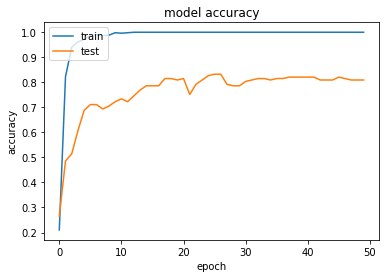

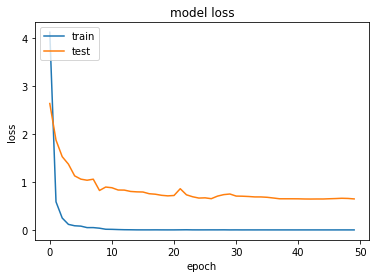

In [262]:
# accuracy plot 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [263]:
p = y_pred_D201_ROI.copy()

In [264]:
q = y_pred_D121_ROI.copy()

In [265]:
r = y_pred_D169_ROI.copy()

In [285]:
MP = (p*q*r)

In [286]:
e = np.zeros_like(MP)
e[np.arange(len(MP)), MP.argmax(1)] = 1
from sklearn.metrics import classification_report
print(classification_report(Y_test, e))
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, e))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.89      1.00      0.94         8
           2       1.00      0.60      0.75         5
           3       1.00      0.75      0.86         8
           4       0.40      0.67      0.50         3
           5       0.71      0.62      0.67         8
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         6
          11       1.00      0.50      0.67         6
          12       0.86      1.00      0.92         6
          13       1.00      1.00      1.00         4
          14       0.50      0.50      0.50         2
          15       0.82      1.00      0.90         9
          16       0.83      0.83      0.83         6
          17       1.00    

In [275]:
MP = (p*r)

In [276]:
e = np.zeros_like(MP)
e[np.arange(len(MP)), MP.argmax(1)] = 1
from sklearn.metrics import classification_report
print(classification_report(Y_test, e))
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, e))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.89      1.00      0.94         8
           2       1.00      0.60      0.75         5
           3       1.00      0.75      0.86         8
           4       0.40      0.67      0.50         3
           5       0.71      0.62      0.67         8
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         7
          10       1.00      0.83      0.91         6
          11       0.75      0.50      0.60         6
          12       0.86      1.00      0.92         6
          13       1.00      1.00      1.00         4
          14       0.50      0.50      0.50         2
          15       0.73      0.89      0.80         9
          16       1.00      0.83      0.91         6
          17       1.00    

In [277]:
MP = (q*r)

In [278]:
e = np.zeros_like(MP)
e[np.arange(len(MP)), MP.argmax(1)] = 1
from sklearn.metrics import classification_report
print(classification_report(Y_test, e))
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, e))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.89      1.00      0.94         8
           2       1.00      0.60      0.75         5
           3       0.78      0.88      0.82         8
           4       0.40      0.67      0.50         3
           5       0.80      0.50      0.62         8
           6       0.83      1.00      0.91         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         6
          11       1.00      0.67      0.80         6
          12       0.86      1.00      0.92         6
          13       0.80      1.00      0.89         4
          14       0.50      0.50      0.50         2
          15       0.73      0.89      0.80         9
          16       0.83      0.83      0.83         6
          17       1.00    

In [281]:
MP = (q*r)/2

In [282]:
e = np.zeros_like(MP)
e[np.arange(len(MP)), MP.argmax(1)] = 1
from sklearn.metrics import classification_report
print(classification_report(Y_test, e))
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, e))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.89      1.00      0.94         8
           2       1.00      0.60      0.75         5
           3       0.78      0.88      0.82         8
           4       0.40      0.67      0.50         3
           5       0.80      0.50      0.62         8
           6       0.83      1.00      0.91         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         6
          11       1.00      0.67      0.80         6
          12       0.86      1.00      0.92         6
          13       0.80      1.00      0.89         4
          14       0.50      0.50      0.50         2
          15       0.73      0.89      0.80         9
          16       0.83      0.83      0.83         6
          17       1.00    

In [283]:
MP = (q+ r+p)/3

In [284]:
e = np.zeros_like(MP)
e[np.arange(len(MP)), MP.argmax(1)] = 1
from sklearn.metrics import classification_report
print(classification_report(Y_test, e))
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, e))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.89      1.00      0.94         8
           2       1.00      0.60      0.75         5
           3       0.86      0.75      0.80         8
           4       0.40      0.67      0.50         3
           5       0.56      0.62      0.59         8
           6       0.83      1.00      0.91         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         6
          11       1.00      0.67      0.80         6
          12       0.86      1.00      0.92         6
          13       0.80      1.00      0.89         4
          14       0.50      0.50      0.50         2
          15       0.75      1.00      0.86         9
          16       0.80      0.67      0.73         6
          17       1.00    